In [1]:
%matplotlib widget
import spectral as spy
import spectral.io.envi as envi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import japanize_matplotlib

from PIL import Image
import csv
import mplcursors

from scipy.signal import argrelmax
import seaborn as sns

import pandas as pd 

In [2]:
HDR_PATH_iphone = '/data/iphone_blue_200_compare_2023-08-07_009/results/REFLECTANCE_2023-08-07_009.hdr'
HDR_PATH_pixel = '/data/pixel_blue_200_compare_2023-08-07_003/results/REFLECTANCE_2023-08-07_003.hdr'
HDR_PATH_huawei = '/data/huawei_blue_200_compare_2023-08-07_004/results/REFLECTANCE_2023-08-07_004.hdr'

IMG_PATH_iphone = '/data/iphone_blue_200_compare_2023-08-07_009/results/REFLECTANCE_2023-08-07_009.png'
IMG_PATH_pixel = '/data/pixel_blue_200_compare_2023-08-07_003/results/REFLECTANCE_2023-08-07_003.png'
IMG_PATH_huawei = '/data/huawei_blue_200_compare_2023-08-07_004/results/REFLECTANCE_2023-08-07_004.png'

In [3]:
spec_img_i = envi.open(HDR_PATH_iphone)
spec_img_p = envi.open(HDR_PATH_pixel)
spec_img_h = envi.open(HDR_PATH_huawei)

In [4]:
wave_lengthes = []
hdr = envi.read_envi_header(HDR_PATH_iphone)

for wl in hdr['wavelength']:
    wave_lengthes.append(float(wl))

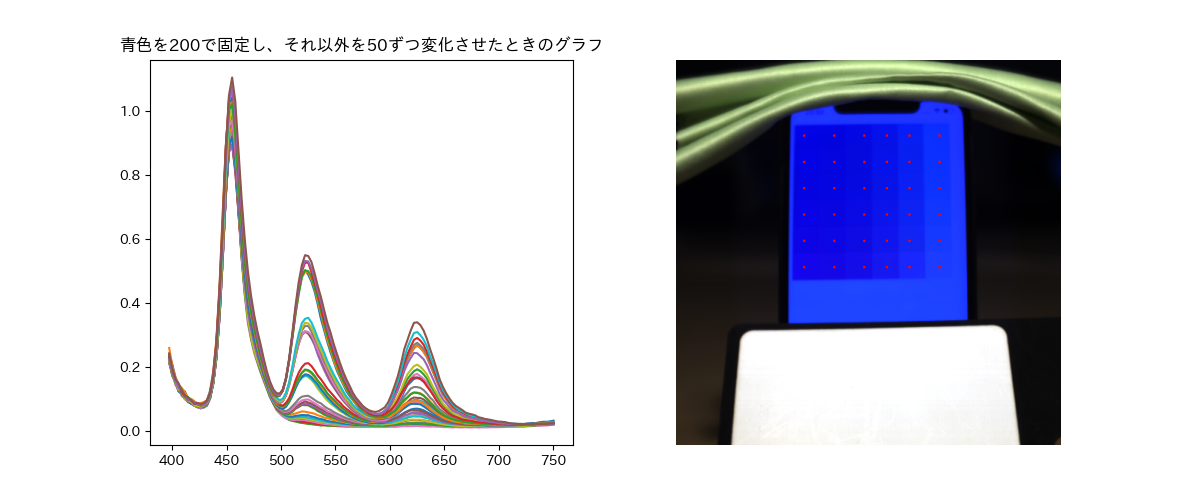

In [5]:
pixel_x = 350 # X座標
pixel_y = 240  # Y座標
color = (255, 0, 0)  # 色(RGB値)

coors = [(170,100),(210,100),(250,100),(280,100),(310,100),(350,100)]

dots=[-1,0,1]
image_i = Image.open(IMG_PATH_iphone)
for coor in coors:
    for t in range(6):
        for i in dots:
            for j in dots:
                image_i.putpixel((coor[0]+i, coor[1]+35*t+j), color)
        
x = wave_lengthes[:121]
ys = []
for coor in coors:
    for t in range(6):
        ys.append(spec_img_i.read_pixel(512-coor[0],coor[1]+35*t)[:121])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)



for y in ys:
    ax1.plot(x,y)
ax1.set_title('青色を200で固定し、それ以外を50ずつ変化させたときのグラフ')
ax2.imshow(image_i)
ax2.axis('off')
mplcursors.cursor(hover=True)

plt.show()

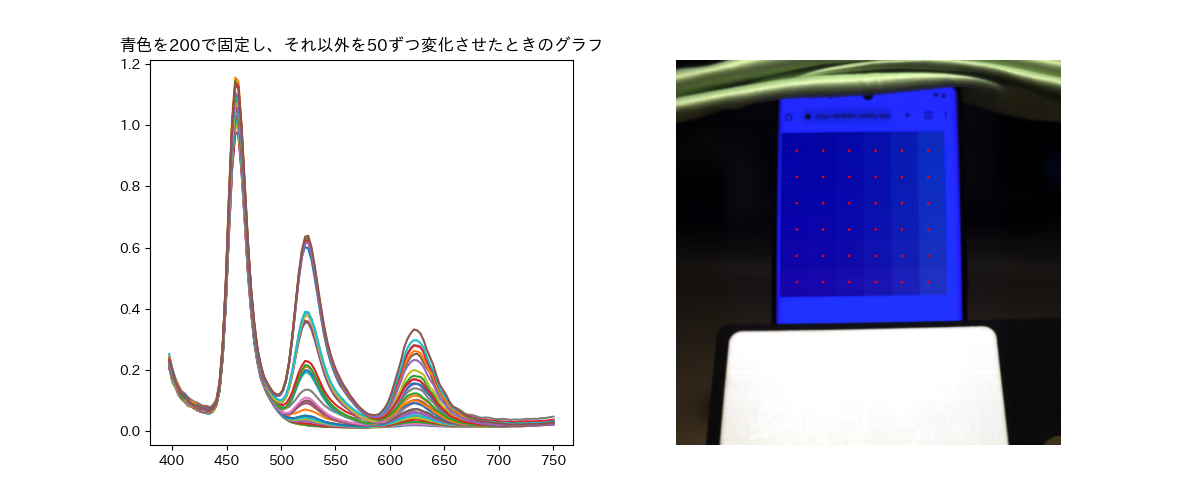

In [6]:
pixel_x = 350 # X座標
pixel_y = 240  # Y座標
color = (255, 0, 0)  # 色(RGB値)

coors = [(160,120),(195,120),(230,120),(265,120),(300,120),(335,120)]

dots=[-1,0,1]
image_p = Image.open(IMG_PATH_pixel)
for coor in coors:
    for t in range(6):
        for i in dots:
            for j in dots:
                image_p.putpixel((coor[0]+i, coor[1]+35*t+j), color)
        
x = wave_lengthes[:121]
ys_p = []
for coor in coors:
    for t in range(6):
        ys_p.append(spec_img_p.read_pixel(512-coor[0],coor[1]+35*t)[:121])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)



for y in ys_p:
    ax1.plot(x,y)
ax1.set_title('青色を200で固定し、それ以外を50ずつ変化させたときのグラフ')
ax2.imshow(image_p)
ax2.axis('off')
mplcursors.cursor(hover=True)

plt.show()

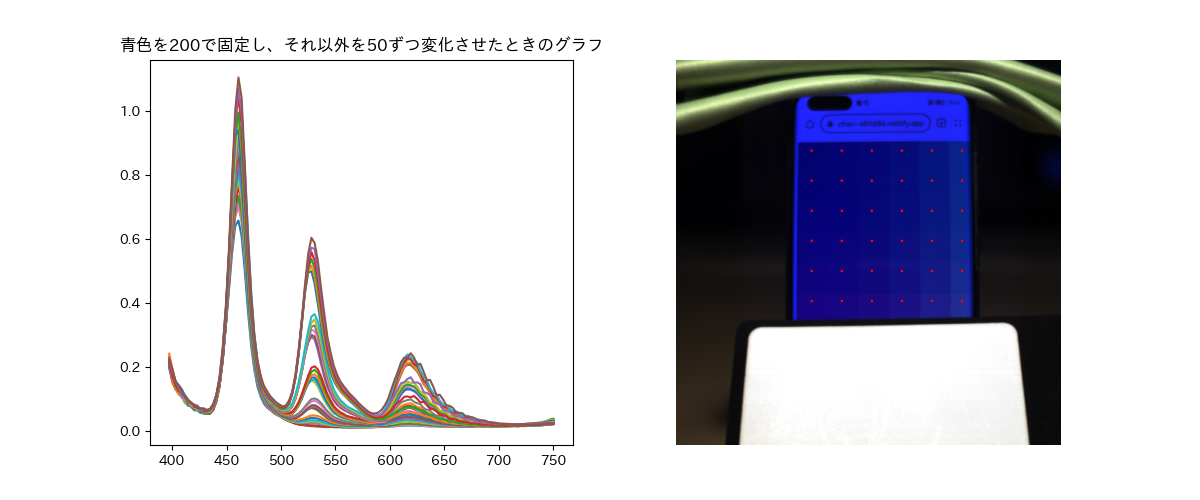

In [7]:
pixel_x = 350 # X座標
pixel_y = 240  # Y座標
color = (255, 0, 0)  # 色(RGB値)

coors = [(180,120),(220,120),(260,120),(300,120),(340,120),(380,120)]

dots=[-1,0,1]
image_h = Image.open(IMG_PATH_huawei)
for coor in coors:
    for t in range(6):
        for i in dots:
            for j in dots:
                image_h.putpixel((coor[0]+i, coor[1]+40*t+j), color)
        
x = wave_lengthes[:121]
ys_h = []
for coor in coors:
    for t in range(6):
        ys_h.append(spec_img_h.read_pixel(512-coor[0],coor[1]+40*t)[:121])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)



for y in ys_h:
    ax1.plot(x,y)
ax1.set_title('青色を200で固定し、それ以外を50ずつ変化させたときのグラフ')
ax2.imshow(image_h)
ax2.axis('off')
mplcursors.cursor(hover=True)

plt.show()

0.97172874 0.05483721
(array([20, 43, 78]),)


,g_0,g_50,g_100,g_150,g_200,g_250
r_0,0.947796,0.922364,0.903824,0.967517,0.957126,1.005794
r_50,0.917633,0.895713,0.902665,0.925754,0.949015,0.972190
r_100,0.935035,0.895713,0.894554,0.930394,0.944380,0.979143
r_150,0.955916,0.937428,0.921205,0.969838,0.982619,1.005794
r_200,0.994200,0.965238,0.972190,1.009281,1.006953,1.063731
r_250,1.040603,1.027810,1.023175,1.076566,1.077636,1.105446


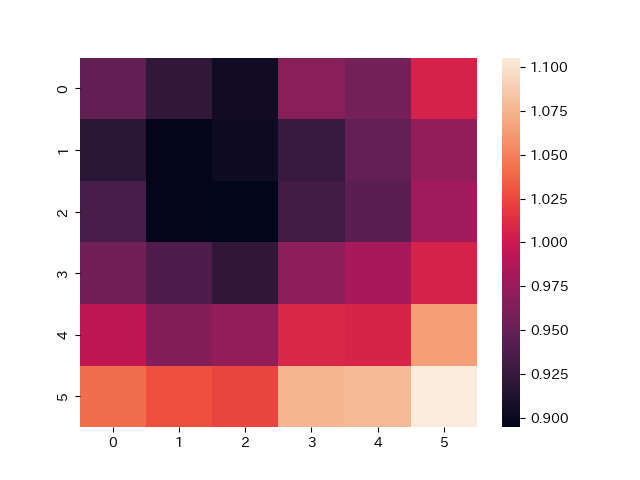

In [15]:
blue_i = []
for y in ys:
    ex_max_i=argrelmax(y,order=3)
    blue_i.append(y[20])
print(np.mean(blue_i),np.std(blue_i))
print(ex_max_i)

plt.figure()
sns.heatmap(np.array(blue_i).reshape(-1, 6))

df_p = pd.DataFrame(np.array(blue_i).reshape(-1, 6),
                  columns = ["g_0","g_50","g_100","g_150","g_200","g_250"],
                  index = ["r_0","r_50","r_100","r_150","r_200","r_250"])
df_p

0.92232895 0.045309935
(array([21, 44, 77]),)


,g_0,g_50,g_100,g_150,g_200,g_250
r_0,0.869159,0.885648,0.879813,0.893692,0.861144,0.897196
r_50,0.870327,0.885648,0.875146,0.882009,0.901984,0.921729
r_100,0.896028,0.857643,0.883314,0.905374,0.901984,0.945093
r_150,0.892523,0.890315,0.901984,0.947430,0.947491,0.943925
r_200,0.913551,0.925321,0.963827,0.964953,0.938156,0.967290
r_250,0.976636,1.024504,1.007001,1.003505,0.981330,1.001168


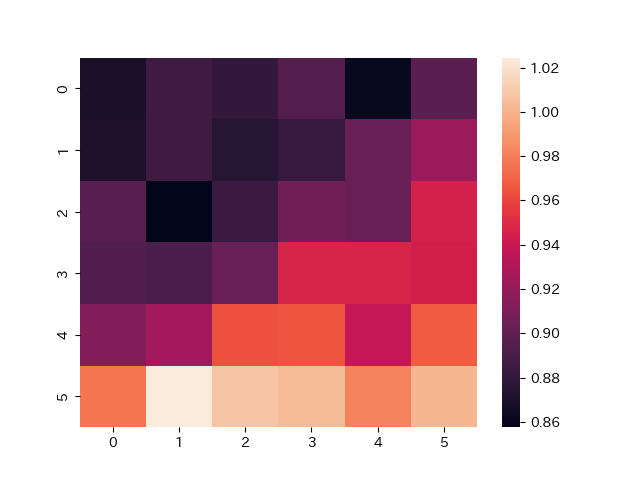

In [16]:
blue_p = []
for y in ys_p:
    ex_max_p=argrelmax(y,order=3)
    blue_p.append(y[20])
print(np.mean(blue_p),np.std(blue_p))
print(ex_max_p)

plt.figure()
sns.heatmap(np.array(blue_p).reshape(-1, 6))
df_p = pd.DataFrame(np.array(blue_p).reshape(-1, 6),
                  columns = ["g_0","g_50","g_100","g_150","g_200","g_250"],
                  index = ["r_0","r_50","r_100","r_150","r_200","r_250"])
df_p


0.6598753 0.059861854
(array([ 22,  45,  76, 119]),)


<Axes: >

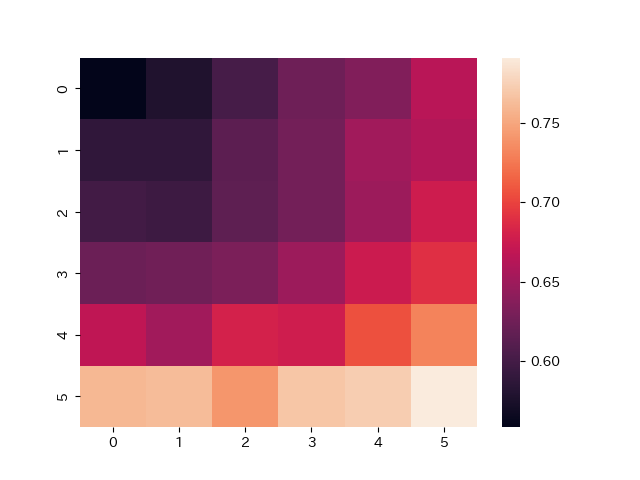

In [17]:
blue_h = []
red_h = []
green_h = []
for y in ys_h:
    ex_max_h=argrelmax(y,order=3)
    blue_h.append(y[20])
for y in ys_h:
    ex_max_h=argrelmax(y,order=3)
    green_h.append(y[ex_max_h[0][1]])
    
for y in ys_h:
    ex_max_h=argrelmax(y,order=3)
    red_h.append(y[76])
    
print(np.mean(blue_h),np.std(blue_h))
print(ex_max_h)

plt.figure()
sns.heatmap(np.array(blue_h).reshape(-1, 6))

In [18]:
def correction_RGB(blue):
    test = np.array(blue).reshape(-1, 6)
    diffs = []
    for i in range(6):
        diffs.append(test[i][5]-test[i][0])
    diff_mean = np.mean(diffs)
    diff_mean_per_g = diff_mean/5
    print('diff_mean_per_g',diff_mean_per_g)
    for i in range(6):
        for j in range(6):
            test[i][j] -= diff_mean_per_g*j

    diffs_r = []
    for i in range(6):
        diffs_r.append(test[5][i]-test[0][i])
    diff_mean_r = np.mean(diffs_r)
    diff_mean_per_r = diff_mean_r/5
    print('diff_mean_per_r',diff_mean_per_r)
    for i in range(6):
        for j in range(6):
            test[i][j] -= diff_mean_per_r*i
    print(test)


    plt.figure()
    sns.heatmap(test)

    test = test.ravel()
    print(np.mean(test),np.std(test))

In [12]:
def correction_spectral(blue,green,red):
    blue = np.array(blue).reshape(-1,6)
    green = np.array(green).reshape(-1,6)
    red = np.array(red).reshape(-1,6)
    
    row_red_diffs = []
    row_green_diffs = []
    row_blue_diffs = []
    for i in range(6):
        row_blue_diffs.append(blue[i][5] - blue[i][0])
        row_green_diffs.append(green[i][5] - green[i][0])
    print(row_blue_diffs)
    print(row_green_diffs)
        

diff_mean_per_g 0.008605921268463134
diff_mean_per_r 0.02358308881521225
[[0.86915886 0.8770417  0.86260146 0.86787385 0.8267198  0.8541666 ]
 [0.846744   0.8534586  0.8343509  0.83260846 0.84397686 0.85511625]
 [0.8488619  0.8018709  0.8189359  0.8323899  0.8203938  0.8548977 ]
 [0.82177407 0.8109599  0.81402254 0.85086286 0.84231824 0.8301464 ]
 [0.81921905 0.8223826  0.8522831  0.84480315 0.8094003  0.8299278 ]
 [0.85872006 0.89798266 0.87187386 0.85977143 0.82899106 0.8402232 ]]
0.84185636 0.021230344


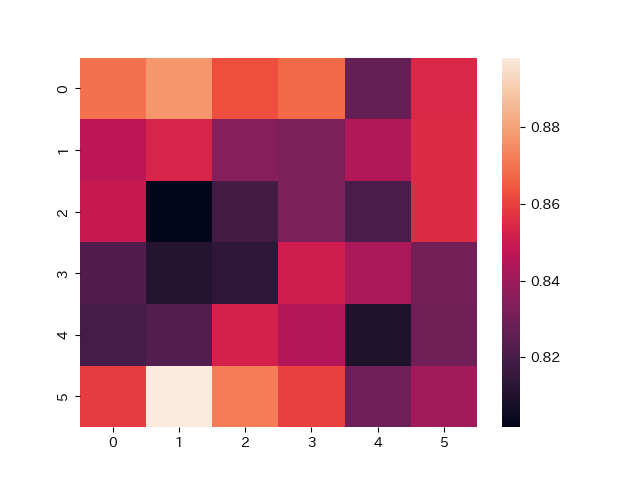

In [20]:
# correction_RGB(blue_i)
correction_RGB(blue_p)
# correction_RGB(blue_h)

In [14]:
correction_spectral(blue_h,green_h,red_h)

[0.17273962, 0.13837546, 0.14153743, 0.13324535, 0.1562435, 0.16365033]
[0.017800774, 0.021105122, 0.030345358, 0.04417385, 0.07051203, 0.10461125]
